# Big Data Bandits

A Project-Group of the DHBW Karlsruhe participating in a AI-powerd World.

# Dataunderstandig
Das Dataunderstanding ermöglicht einen detaillierten Überblick über die Beschaffenheit der Datensätze.
Dieser Ausschnitt ist auch in der [code_main.ipynb](code\_main.ipynb) vertreten.
Eine ausführliche Beurteilung der Datensätze, sowie eine ausführliche Analyse und Beantwortung der Fragestellung sind dem [Abstract](Abstract/Abstract.pdf) zu entnehmen.


0. [Bibliotheken](#0-bibliotheken)
1. [Datensätze](#1-datensätze)
    1. [Datensätze einlesen](#11-datensätze-einlesen)
    2. [Datenverständnis](#12-datenverständnis)
        1. [Datendichte](#121-datendichte)

<a name="0-bibliotheken"></a>
## 0. Bibliotheken ##
Es werden diese Libraries zur Ausführung benötigt.

In [1]:
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

<a name="1-datensätze"></a>
## 1. Datensätze ##

<a name="11-datensätze-einlesen"></a>
### 1.1. Datensätze einlesen ###
Zu Beginn der Analyse werden die Datensätze in einen Pandas-Dataframe eingelesen. Dabei werden ebenfalls die Daten der "Date" bzw. "Datetime" Spalte korrekt als Python Datetime-Objekt geparst, um eine zukünftige, datumsbasierte Weiterverarbeitung zu erleichtern. Dies geschieht durch den Lambda-Ausdruck: *datetime.strptime(x[0:10], '%Y-%m-%d')* der auf die entsprechende Spalte angewandt wird. Dabei enthält jeder String der entsprechenden Spalte bis zum 10. Charakter das Datum formatiert in Jahr-Monat-Tag. Uhrzeiten und andere folgenden Zeitreferenzen werden einfach abgeschnitten, da auch die Stockdatensätze nur tagesbezogene Daten beinhalten.

In [2]:
dateparse = lambda x: datetime.strptime(x[:10], '%Y-%m-%d')

#Read the CSV files and put them into pandas DataFrame objects
Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse).rename(columns={'datetime': 'date'})
Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv', parse_dates=['date'], date_parser=dateparse)
Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv', parse_dates=['date'], date_parser=dateparse)

display(Posts.head())
display(Tesla.head())
display(Dogecoin.head())

C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_14856\3951701588.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse).rename(columns={'datetime': 'date'})
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_14856\3951701588.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv', parse_dates=['date'], date_parser=dateparse)
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_14856\3951701588.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or 

,date,tweet id,text,username
0,2023-06-29,1674452749378002945,@mwseibel Yup,elonmusk
1,2023-06-29,1674446089179766789,@TitterDaily True,elonmusk
2,2023-06-29,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk
3,2023-06-29,1674226170488057856,Improved longform posts,elonmusk
4,2023-06-28,1674116945808068608,@BillyM2k Best protip ever,elonmusk


,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN


,date,open,high,low,raw_close,close,volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


<a name="12-datenverständnis"></a>
### 1.2. Datenverständnis ###

<a name="121-datendichte"></a>
#### 1.2.1. Datendichte ###
Der nun folgende Abschnitt erstellt eine grafische Übersicht, welche die fehlenden Tage aus den Datensätzen entsprechend dem Datum aufträgt.
Dafür erstellt die Methode *get_density* einen neuen Datensatz mit der Auswertung. 
Dieser neue Datensatz enthält nun in der Spalte "date" alle Daten, die bei Vollständigkeit in dem zu untersuchenden Datensatz enthalten sein müssten.
Die Spalte "exists" enthält nun für jedes Datum den entsprechenden Boolean- bzw. Integer-Wert 1 oder 0.
Dabei bedeutet eine 1, dass der Tag im untersuchten Datensatz existiert, während eine 0 für einen fehlenden Tag im untersuchten Datensatz steht.

In [3]:
def get_density(df:pd.DataFrame):
    start_date = min(df["date"]).replace(hour=0, minute=0, second=0, microsecond=0)
    end_date = max(df["date"]).replace(hour=0, minute=0, second=0, microsecond=0) + pd.Timedelta(days=1)

    all_dates = pd.DataFrame({'date': pd.date_range(start_date, end_date, freq='D')})
    all_dates['exists'] = all_dates['date'].isin(df["date"]).astype(int)

    return all_dates

Im Folgenden wird für alle 3 Datensätze diese Auswertung erstellt.

In [4]:
Posts_density = get_density(Posts)
Tesla_density = get_density(Tesla)
Dogecoin_density = get_density(Dogecoin)

Daraufhin können diese neuen Datensätze unter Verwendung von PyPlot graphisch dargestellt werden.
Dabei ist insbesondere die Größe des Plots relevant, da sonst die wenigen fehlenden Werte in der Gesamtmasse untergehen würden.
So werden jeweils zunächst die existenten Tage in Blau aufgetragen, anschließend werden die fehlenden Tage in Rot ergänzt.

Text(2017-11-09 00:00:00, 4.5, 'Dogecoin')

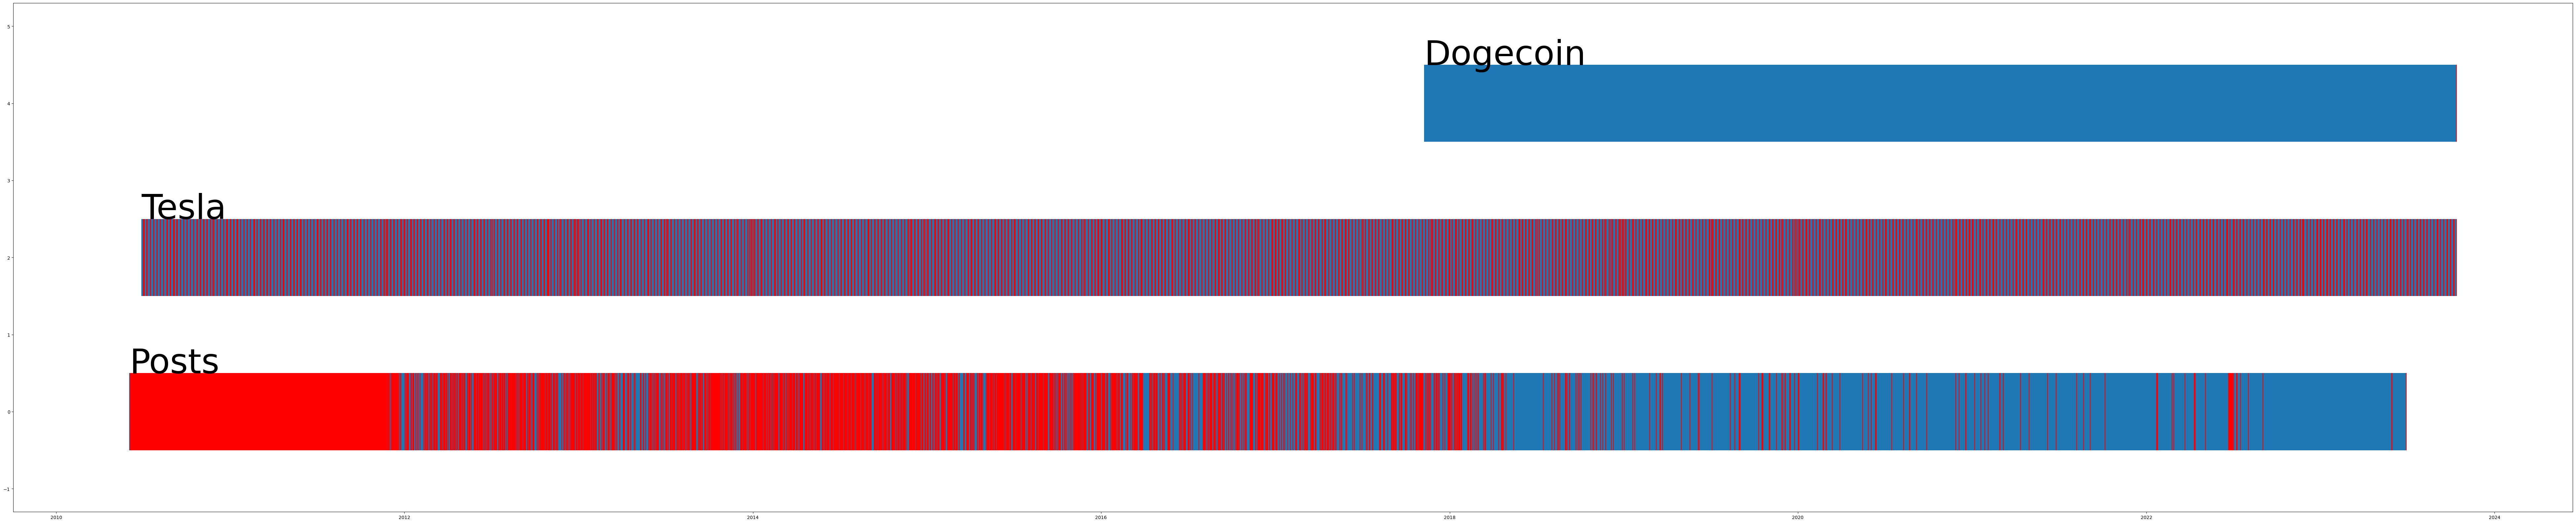

In [5]:
plt.figure(figsize=(100,20))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.eventplot(Posts_density.loc[Posts_density['exists'] == 1, 'date'], lineoffsets=0, label = "Posts")
plt.eventplot(Posts_density.loc[Posts_density['exists'] == 0, 'date'], lineoffsets=0, colors=['red'])

plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 1, 'date'], lineoffsets=2, label = "Tesla")
plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 0, 'date'], lineoffsets=2, colors=['red'])

plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 1, 'date'], lineoffsets=4, label = "Dogecoin")
plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 0, 'date'], lineoffsets=4, colors=['red'])

plt.text(Posts_density.loc[Posts_density['exists'] == 1, 'date'].iloc[0], 0.5, 'Posts', color='black', fontsize=75)
plt.text(Tesla_density.loc[Tesla_density['exists'] == 1, 'date'].iloc[0], 2.5, 'Tesla', color='black', fontsize=75)
plt.text(Dogecoin_density.loc[Dogecoin_density['exists'] == 1, 'date'].iloc[0], 4.5, 'Dogecoin', color='black', fontsize=75)

Zu guter Letzt lassen wir uns noch den fehlenden Anteil der Daten im Verhältnis zum gesamten Datensatz in Prozent ausgeben.

<BarContainer object of 3 artists>

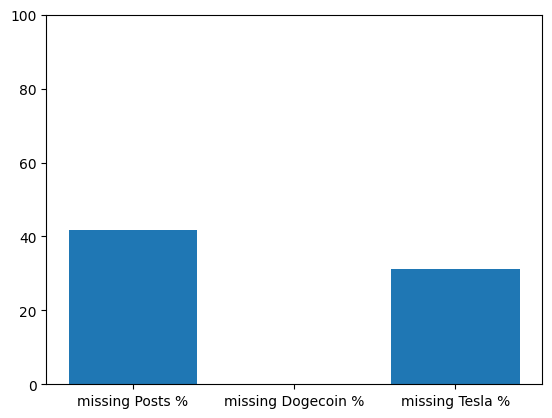

In [6]:
plt.ylim(0, 100)

plt.bar(
    ["missing Posts %", "missing Dogecoin %", "missing Tesla %"], 
    [
        (Posts_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Dogecoin_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Tesla_density['exists'].value_counts(normalize=True) * 100).get(0, 0)
     
    ]
)